# Submission 1 - Machine Learning Terapan - Predictive Analytics

Name : Alfia N. Rakhmatika<br>
Dataset : IBM HR Analytics Employee Attrition & Performance https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset<br>
Problem : Classification

# Load Modules & Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

warnings.simplefilter(action='ignore')
%matplotlib inline

In [2]:
# Datasets
dfraw = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv', sep=',')
df = dfraw.copy()
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.shape

(1470, 35)

Check Missing Value

In [5]:
print ("Missing Values per column:")
df.isna().sum()

Missing Values per column:


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Change Value for Several Columns

In [6]:
# Replace several columns with integers 
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)


Histogram

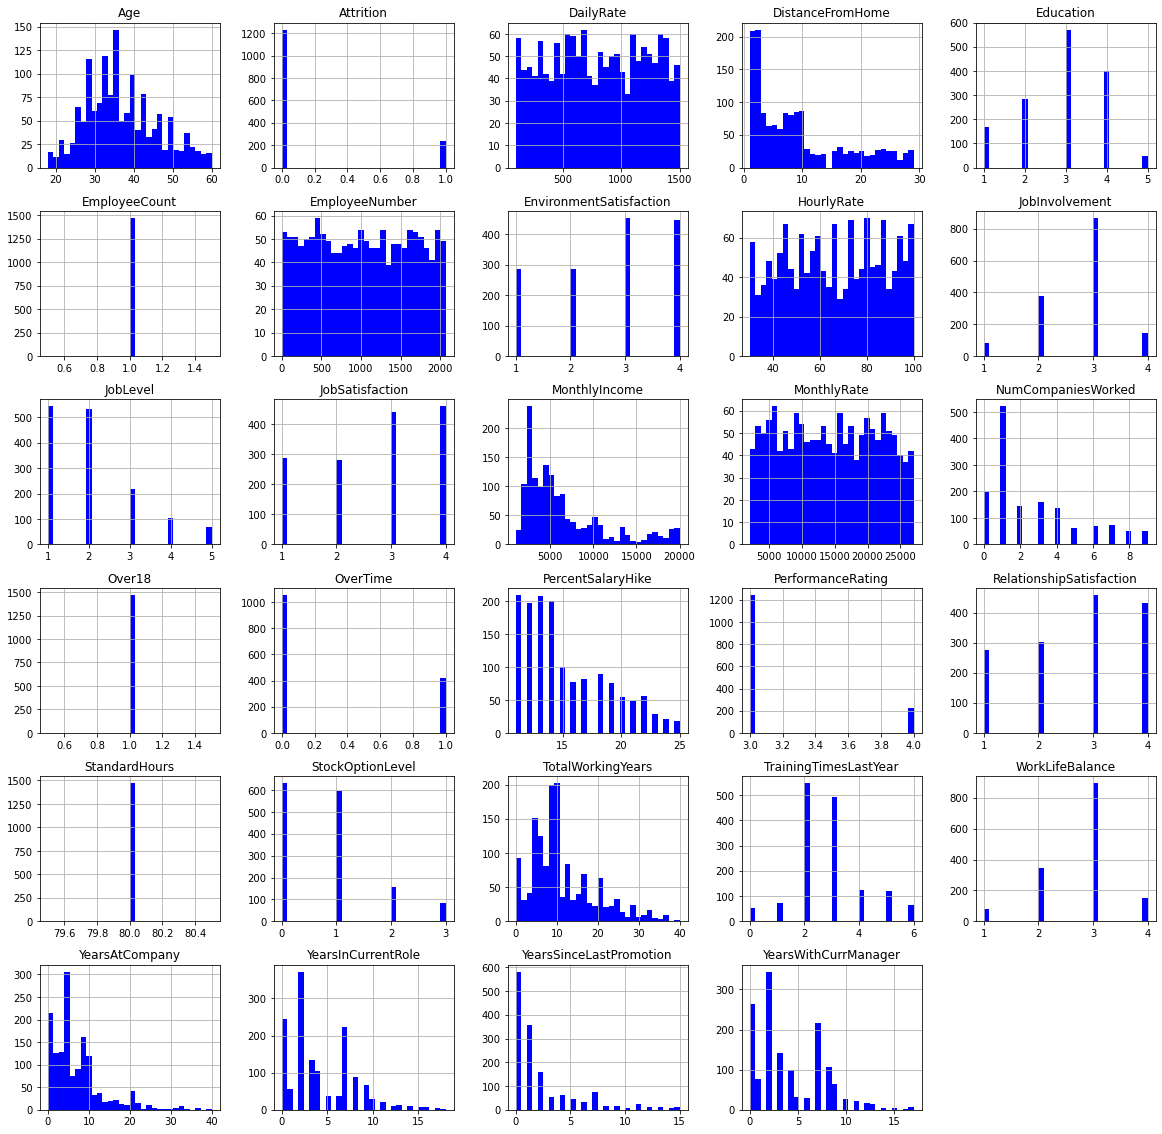

In [7]:
df.hist(bins = 30, figsize = (20,20), color = 'b')
warnings.filterwarnings("ignore")

Unique Value

In [8]:
for col in df.columns:
    print(f'Unique values in column {col}:')
    print(df[col].unique())
    print()

Unique values in column Age:
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]

Unique values in column Attrition:
[1 0]

Unique values in column BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Unique values in column DailyRate:
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355

Explore Statistic Descriptive of each Target

In [9]:
left_df = df[df['Attrition'] == 1]
stayed_df = df[df['Attrition'] == 0]

In [10]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,1.0,0.535865,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.0,0.499768,3.770294,0.363735,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,1.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,1.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.0,1.000000,14.000000,3.000000,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.0,1.000000,17.000000,3.000000,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [11]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,1.0,0.234388,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,0.0,606.217074,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.0,0.423787,3.639511,0.360408,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,1.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,1.0,483.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,1.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,1.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,1.0,1574.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,1.0,0.000000,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


Heatmap

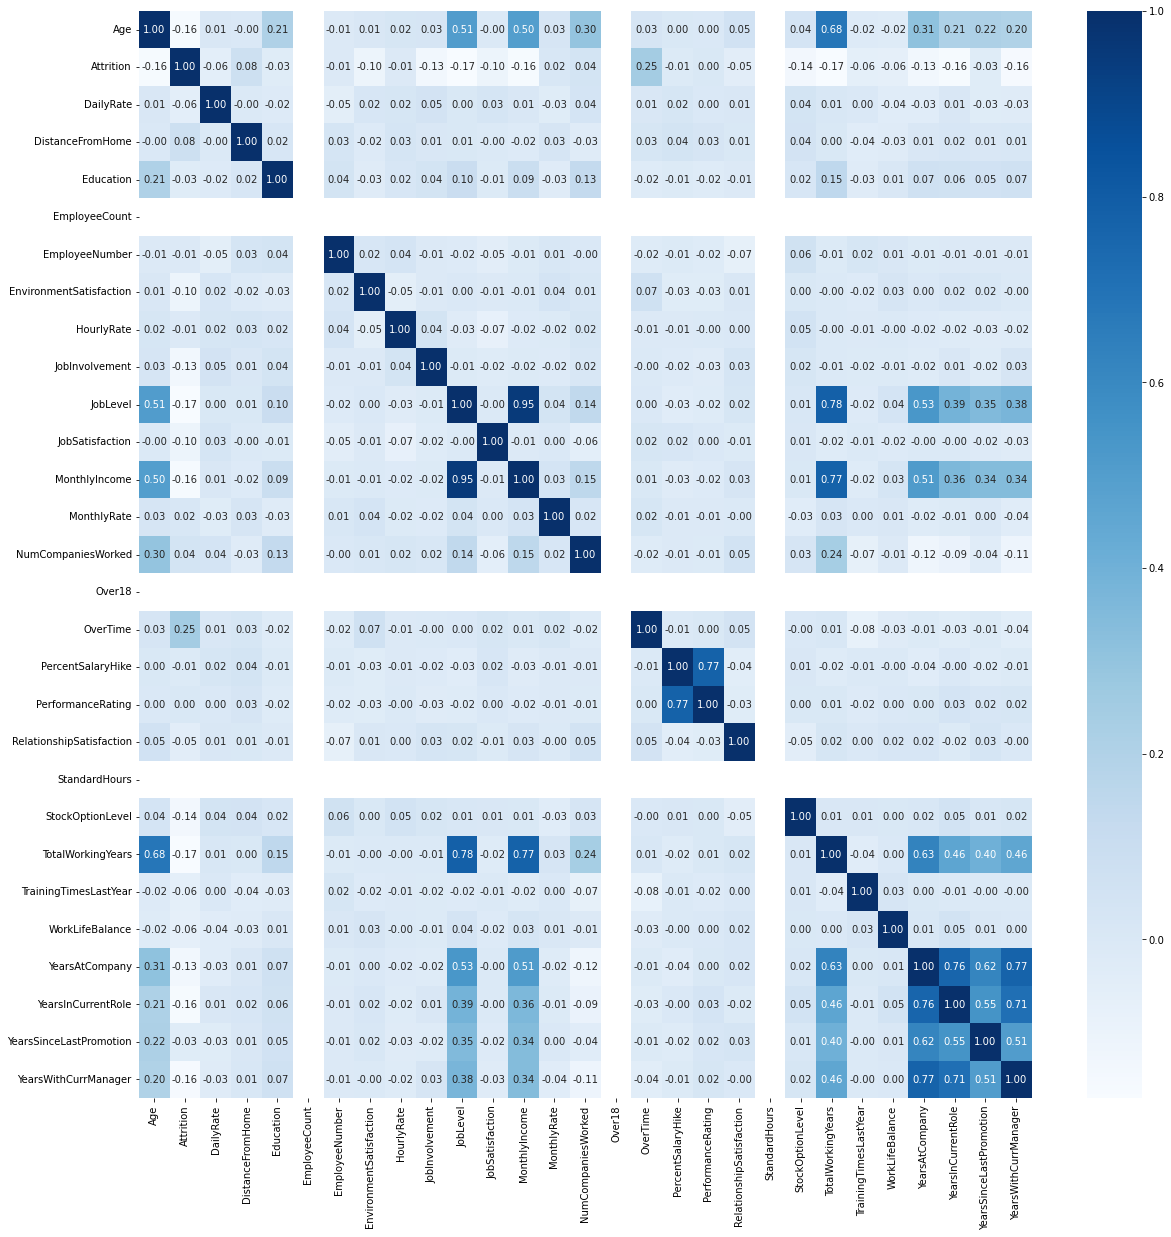

In [12]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
warnings.filterwarnings("ignore")

Boxplot of Monthly Income

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

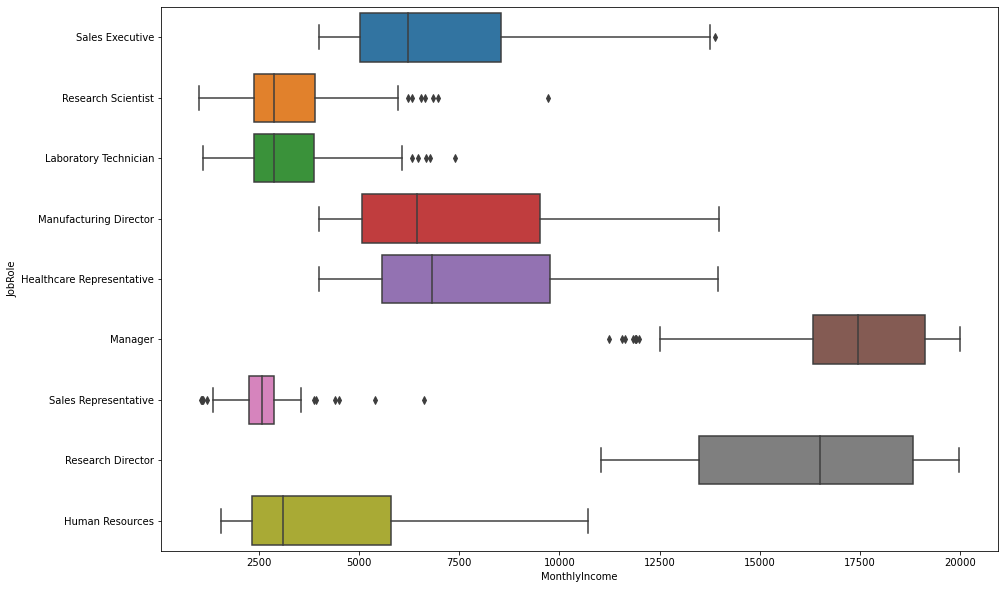

In [13]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = df)

Check for Target Imbalance

[Text(0.5, 0, 'Attrition'), Text(0, 0.5, 'Count')]

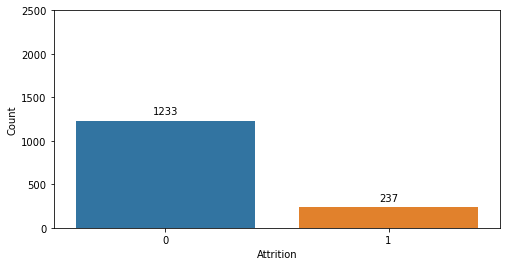

In [14]:
target = df.groupby(['Attrition']).Gender.agg('count').reset_index()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharey=True)
ax = sns.barplot(x='Attrition', y='Gender', data=target)

for p in ax.patches:
    ax.annotate('{}'.format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set(ylim=(0, 2500))
ax.set(xlabel='Attrition', ylabel='Count')

# Data Preparation

Drop Columns with Single Unique Value and High Correlation

In [15]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber', 'JobLevel'], axis=1, inplace=True)

Onehot Encoding for Categorical Data

In [16]:
# Separate Categorical and Numerical Data
num_dtypes=['int64','float64']
cat_dtypes=['object']

num_df = df.select_dtypes(include = num_dtypes)
cat_df = df.select_dtypes(include = cat_dtypes)
numericals = num_df.columns
categoricals = cat_df.columns

print(numericals)
print(categoricals)

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')


In [17]:
# Onehot encoding

for col in categoricals:
  df = pd.get_dummies(df, columns=[col], prefix=[col])

In [18]:
df.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,61,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,92,2,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,40,3,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [19]:
df.shape

(1470, 50)

Separate Features and Target Dataset

In [20]:
feat = df.drop('Attrition', axis=1)

In [21]:
target = df['Attrition']

Scaling Data

In [22]:
scaler = MinMaxScaler()
X = scaler.fit_transform(feat)

Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2)

# Model

Logistic Regression Model

In [24]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

<AxesSubplot:>

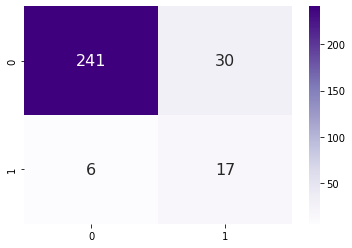

In [25]:
y_pred = logit.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, cmap='Purples', annot_kws={"size": 16}, fmt='d')

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.74      0.36      0.49        47

    accuracy                           0.88       294
   macro avg       0.81      0.67      0.71       294
weighted avg       0.87      0.88      0.86       294



In [27]:
print("Accuracy : ", round(accuracy_score(y_test, y_pred), 2))
print("Precision : ", round(precision_score(y_test, y_pred, average='macro'), 2))
print("Recall : ", round(recall_score(y_test, y_pred, average='macro'), 2))
print("F1 Score : ", round(f1_score(y_test, y_pred, average='macro'), 2))

Accuracy :  0.88
Precision :  0.81
Recall :  0.67
F1 Score :  0.71


Random Forrest

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

<AxesSubplot:>

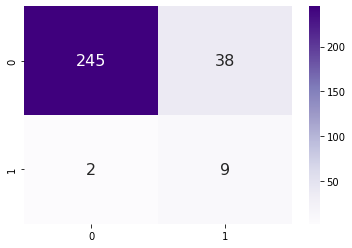

In [29]:
y_predrf = rf.predict(X_test)
cm = confusion_matrix(y_predrf, y_test)
sns.heatmap(cm, annot=True, cmap='Purples', annot_kws={"size": 16}, fmt='d')

In [30]:
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       247
           1       0.82      0.19      0.31        47

    accuracy                           0.86       294
   macro avg       0.84      0.59      0.62       294
weighted avg       0.86      0.86      0.83       294



In [31]:
print("Accuracy : ", round(accuracy_score(y_test, y_predrf), 2))
print("Precision : ", round(precision_score(y_test, y_predrf, average='macro'), 2))
print("Recall : ", round(recall_score(y_test, y_predrf, average='macro'), 2))
print("F1 Score : ", round(f1_score(y_test, y_predrf, average='macro'), 2))

Accuracy :  0.86
Precision :  0.84
Recall :  0.59
F1 Score :  0.62


Artificial Neural Networks

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(49, )))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=300, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=50, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25000     
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 1)                 5

In [33]:
# Compile Model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = [tf.keras.metrics.Recall()])

In [34]:
hist = model.fit(X_train, y_train, epochs = 100, batch_size = 49)

Epoch 1/100
24/24 [==============================] - 3s 7ms/step - loss: 0.4528 - recall: 0.0105
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 0.3878 - recall: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 9ms/step - loss: 0.3555 - recall: 0.0421
Epoch 4/100
24/24 [==============================] - 0s 10ms/step - loss: 0.3396 - recall: 0.2684
Epoch 5/100
24/24 [==============================] - 0s 10ms/step - loss: 0.3173 - recall: 0.3632
Epoch 6/100
24/24 [==============================] - 0s 10ms/step - loss: 0.3089 - recall: 0.4316
Epoch 7/100
24/24 [==============================] - 0s 11ms/step - loss: 0.2907 - recall: 0.4632
Epoch 8/100
24/24 [==============================] - 0s 11ms/step - loss: 0.2707 - recall: 0.5211
Epoch 9/100
24/24 [==============================] - 0s 11ms/step - loss: 0.2653 - recall: 0.4842
Epoch 10/100
24/24 [==============================] - 0s 13ms/step - loss: 0.2586 - recall: 0.5368
Epoch 11/100
24/24

In [35]:
y_predann = model.predict(X_test)

# Set Treshhold, < 0.5 is Class 0
y_predann = (y_predann > 0.5)

10/10 [==============================] - 0s 5ms/step


In [36]:
hist.history.keys()

dict_keys(['loss', 'recall'])

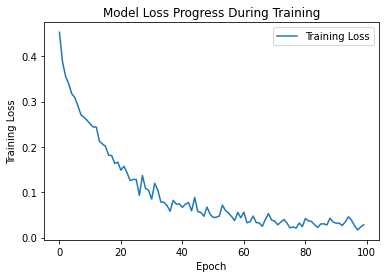

In [37]:
plt.plot(hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

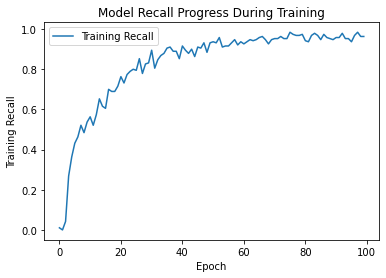

In [38]:
plt.plot(hist.history['recall'])
plt.title('Model Recall Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Recall')
plt.legend(['Training Recall'])

<AxesSubplot:>

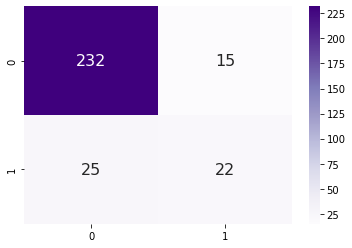

In [39]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_predann)
sns.heatmap(cm, annot=True, cmap='Purples', annot_kws={"size": 16}, fmt='d')

In [40]:
print(classification_report(y_test, y_predann))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       247
           1       0.59      0.47      0.52        47

    accuracy                           0.86       294
   macro avg       0.75      0.70      0.72       294
weighted avg       0.85      0.86      0.86       294



In [41]:
print("Accuracy : ", round(accuracy_score(y_test, y_predann), 2))
print("Precision : ", round(precision_score(y_test, y_predann, average='macro'), 2))
print("Recall : ", round(recall_score(y_test, y_predann, average='macro'), 2))
print("F1 Score : ", round(f1_score(y_test, y_predann, average='macro'), 2))

Accuracy :  0.86
Precision :  0.75
Recall :  0.7
F1 Score :  0.72


# END